# Expoloratory Data Analysis & Intro

### Goal
1. Investigate top-paying roles and skills in the data science industry
2. Use Python to explore a real-live dataset on job postings
3. For job-seekers: use these insights to help find the best job opportunities

### Final Deliverables

* Create Jupyter Notebokks (showcasing core skills in Python)
* Create a summary page (via README.md) capturing your findings
* Share this project via GitHub and LinkedIn

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do job and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts?

### Exploratory Data Analysis
##### Roles to Explore:

In [1]:
# Import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for US Data Analyst Roles

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

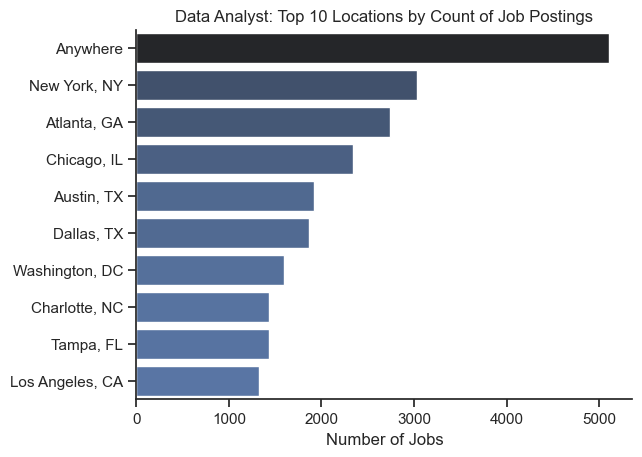

In [14]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Data Analyst: Top 10 Locations by Count of Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


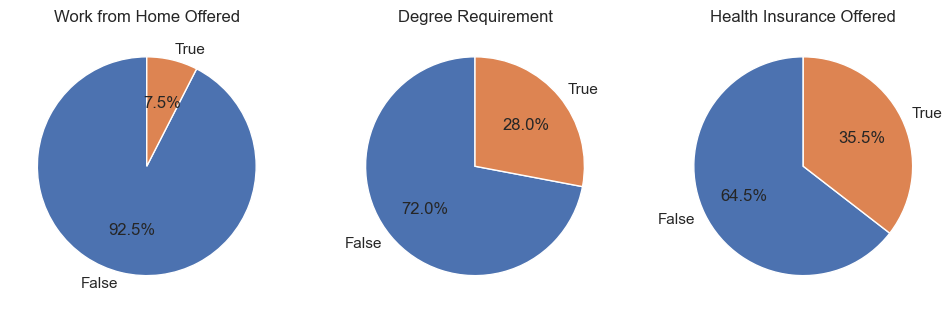

In [15]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=[False, True], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

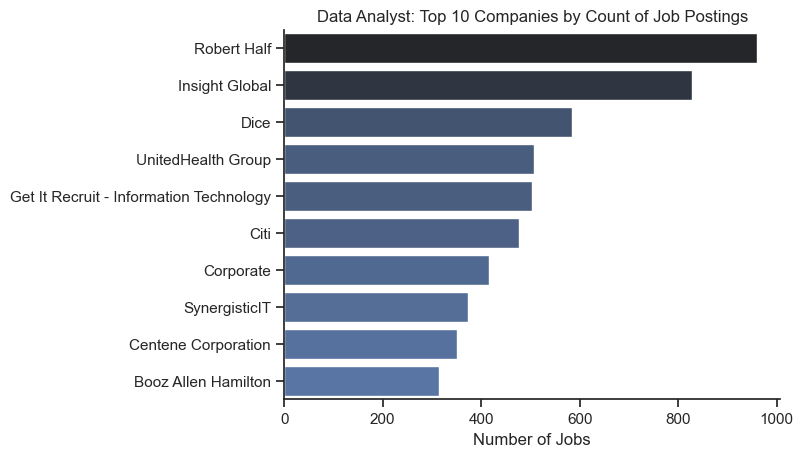

In [16]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Data Analyst: Top 10 Companies by Count of Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()